In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Using dwh/spofity.csv 
spotify_data = pd.read_csv('dwh/spofity.csv')

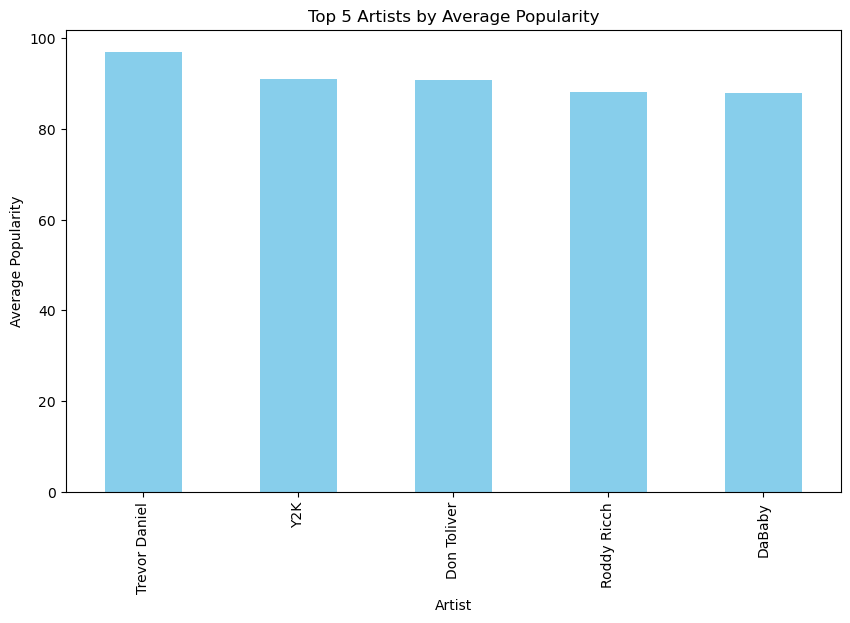

In [18]:
#Q1
# Group by artist and calculate the average of the popularity
artist_popularity = spotify_data.groupby('track_artist')['track_popularity'].mean()

# Top 5 most popular artists
top_artists = artist_popularity.sort_values(ascending=False).head(5)

# Bar chart
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 5 Artists by Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.show()

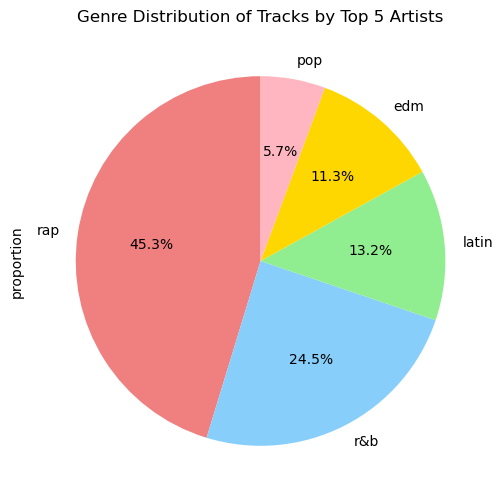

In [19]:
#Q2
#Group by artist and calculate the average of the popularity
artist_popularity = spotify_data.groupby('track_artist')['track_popularity'].mean()

# Top 5 most popular artists
top_artists = artist_popularity.sort_values(ascending=False).head(5)

# Filter to include only tracks by the top 5 artists
top_artists_tracks = spotify_data[spotify_data['track_artist'].isin(top_artists.index)]

# Group by genre and calculate the percentage of tracks in each of the genre
genre_distribution = top_artists_tracks['playlist_genre'].value_counts(normalize=True) * 100

# Pie chart
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink'])
plt.title('Genre Distribution of Tracks by Top 5 Artists')
plt.show()


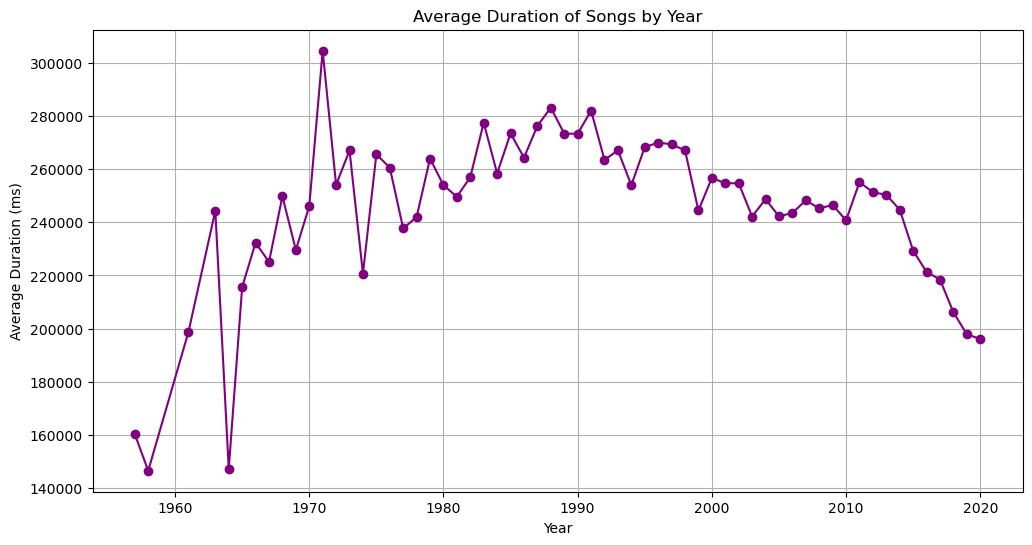

In [20]:
#3

# Change 'track_album_release_date' to datetime with a format
spotify_data['track_album_release_date'] = pd.to_datetime(spotify_data['track_album_release_date'], errors='coerce', format='%Y-%m-%d')

# Extract the year from the release date
spotify_data['release_year'] = spotify_data['track_album_release_date'].dt.year

# Group by year and calculate the average of the duration
average_duration_by_year = spotify_data.groupby('release_year')['duration_ms'].mean()

# A plot
plt.figure(figsize=(12, 6))
average_duration_by_year.plot(marker='o', linestyle='-', color='purple')
plt.title('Average Duration of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (ms)')
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

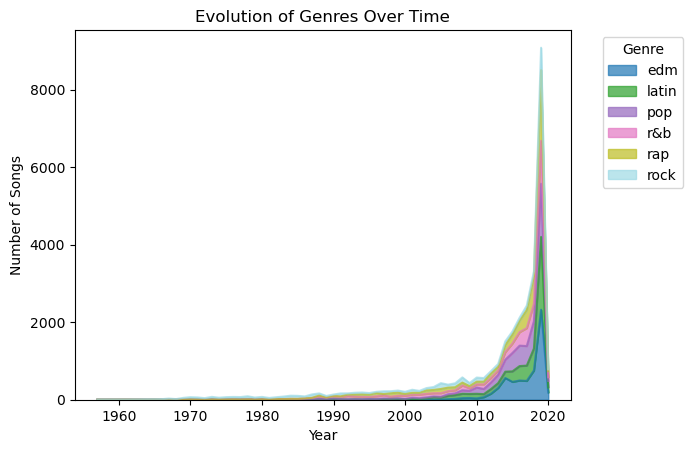

In [15]:
#Q4

# Change 'track_album_release_date' to datetime with a format
spotify_data['track_album_release_date'] = pd.to_datetime(spotify_data['track_album_release_date'], errors='coerce', format='%Y-%m-%d')

# Extract the year from the release date
spotify_data['release_year'] = spotify_data['track_album_release_date'].dt.year

# Group by year and genre and calculate the count of songs
genre_count_by_year = spotify_data.groupby(['release_year', 'playlist_genre']).size().unstack().fillna(0)

# A plot
plt.figure(figsize=(14, 8))
genre_count_by_year.plot(kind='area', stacked=True, colormap='tab20', alpha=0.7)
plt.title('Evolution of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


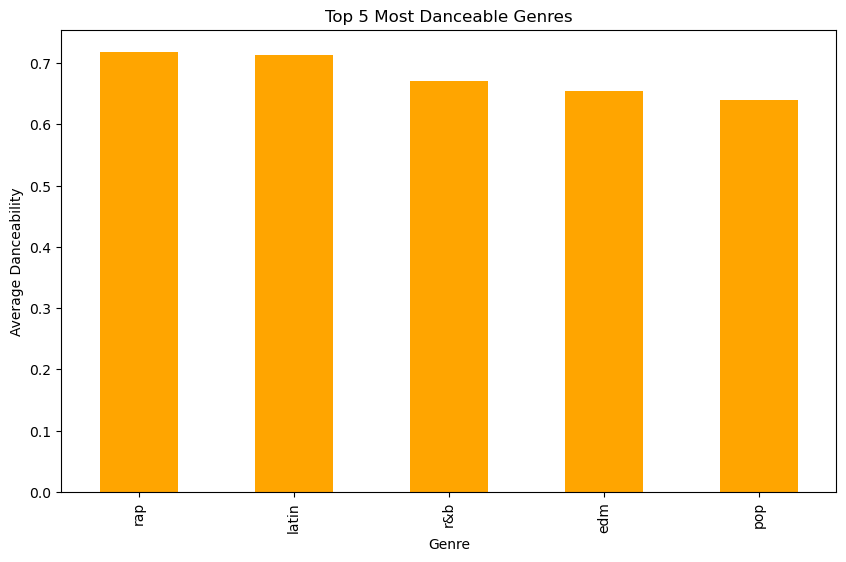

In [21]:
#Q5
# Group by genre and calculate the average of the danceability
average_danceability_by_genre = spotify_data.groupby('playlist_genre')['danceability'].mean()

# Top 5 most danceable genres
top_danceable_genres = average_danceability_by_genre.nlargest(5)

# Bar chart
plt.figure(figsize=(10, 6))
top_danceable_genres.plot(kind='bar', color='orange')
plt.title('Top 5 Most Danceable Genres')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.show()
